In [11]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

train = pd.read_csv('C:/Users/venky/OneDrive/Desktop/NN/Assignment 2/data/sign_mnist_test/sign_mnist_test.csv')
test = pd.read_csv('C:/Users/venky/OneDrive/Desktop/NN/Assignment 2/data/sign_mnist_train/sign_mnist_train.csv')

print(train)

      label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0         6     149     149     150     150     150     151     151     150   
1         5     126     128     131     132     133     134     135     135   
2        10      85      88      92      96     105     123     135     143   
3         0     203     205     207     206     207     209     210     209   
4         3     188     191     193     195     199     201     202     203   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
7167      1     135     119     108     102     105      99      61     103   
7168     12     157     159     161     164     166     166     171     174   
7169      2     190     191     190     191     190     190     192     192   
7170      4     201     205     208     209     214     216     218     223   
7171      2     173     174     173     174     173     173     175     175   

      pixel9  ...  pixel775  pixel776  pixel777  pi

In [4]:
#Datasets as numpy arrays
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype='float32')

print(train_data.shape)

#Define class labels for easy interpretation
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

#Sanity check - plot a few images and labels
# i = random.randint(1,train.shape[0])
# fig1, ax1 = plt.subplots(figsize=(2,2))
# plt.imshow(train_data[i,1:].reshape((28,28)), cmap='gray') 
# print("Label for the image is: ", class_names[int(train_data[i,0])])


# # Data distribution visualization
# fig = plt.figure(figsize=(18,18))
# ax1 = fig.add_subplot(221)
# train['label'].value_counts().plot(kind='bar', ax=ax1)
# ax1.set_ylabel('Count')
# ax1.set_title('Label')

#Dataset seems to be fairly balanced.



(7172, 785)


In [5]:
#Normalize / scale X values
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

print(X_train.shape)

#Convert y to categorical if planning on using categorical cross entropy
#No need to do this if using sparse categorical cross entropy
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

#Reshape for the neural network
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
print(X_train)
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

#########################################################

#Model


(7172, 784)
[[[[0.58431375]
   [0.58431375]
   [0.5882353 ]
   ...
   [0.5882353 ]
   [0.5882353 ]
   [0.58431375]]

  [[0.5882353 ]
   [0.5882353 ]
   [0.5882353 ]
   ...
   [0.5921569 ]
   [0.5882353 ]
   [0.5921569 ]]

  [[0.5882353 ]
   [0.5921569 ]
   [0.5921569 ]
   ...
   [0.5921569 ]
   [0.5921569 ]
   [0.59607846]]

  ...

  [[0.27058825]
   [0.27058825]
   [0.3019608 ]
   ...
   [0.45490196]
   [0.44313726]
   [0.4627451 ]]

  [[0.2901961 ]
   [0.29411766]
   [0.29803923]
   ...
   [0.43137255]
   [0.45490196]
   [0.44313726]]

  [[0.29411766]
   [0.2901961 ]
   [0.2901961 ]
   ...
   [0.4392157 ]
   [0.47058824]
   [0.41960785]]]


 [[[0.49411765]
   [0.5019608 ]
   [0.5137255 ]
   ...
   [0.52156866]
   [0.5254902 ]
   [0.5176471 ]]

  [[0.5058824 ]
   [0.5176471 ]
   [0.5254902 ]
   ...
   [0.53333336]
   [0.53333336]
   [0.5254902 ]]

  [[0.52156866]
   [0.5294118 ]
   [0.5411765 ]
   ...
   [0.54901963]
   [0.54509807]
   [0.5411765 ]]

  ...

  [[0.6784314 ]
   [0.68235

In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(25, activation = 'softmax'))


#If your targets are one-hot encoded, use categorical_crossentropy. Examples of one-hot encodings:
# If your targets are integers, use sparse_categorical_crossentropy. 

#model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()

#history = model.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
history = model.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))


#plot the training and validation accuracy and loss at each epoch


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

(27455,)
(27455, 28, 28, 1)
Predicted Label:  V
True Label:  R


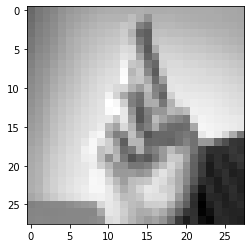

In [14]:
prediction = np.argmax(model.predict(X_test), axis=-1)
print(prediction.shape)
print(X_test.shape)

i = random.randint(1,len(prediction))
plt.imshow(X_test[i,:,:,0], cmap="gray") 
print("Predicted Label: ", class_names[int(prediction[i])])
print("True Label: ", class_names[int(y_test[i])])